In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from vectorizer import get_data, get_vectors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [4]:
purchase_df, user_df = get_data()
vectors = get_vectors(user_df)

[2019-05-26 16:48:45,212] - [INFO] - [get_data] - Raw data loaded
[2019-05-26 16:48:46,526] - [INFO] - [get_data] - Data cleaned
[2019-05-26 16:48:46,544] - [INFO] - [get_vectors] - Collecting vectors
[2019-05-26 16:48:47,422] - [INFO] - [get_vectors] - Vectors ready


In [5]:
v = np.array(list(vectors.values()))

In [81]:
range_n_clusters = [2, 3, 4, 5, 6, 8, 9, 10 ]
s_list = []

In [83]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(v)
    
    silhouette_avg = silhouette_score(v, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    s_list.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.12883861633816998
For n_clusters = 3 The average silhouette_score is : 0.10901948485541411
For n_clusters = 4 The average silhouette_score is : 0.12162731928696224
For n_clusters = 5 The average silhouette_score is : 0.13595087080203036
For n_clusters = 6 The average silhouette_score is : 0.12038813998655813
For n_clusters = 8 The average silhouette_score is : 0.10028922074911296
For n_clusters = 9 The average silhouette_score is : 0.10530696507636192
For n_clusters = 10 The average silhouette_score is : 0.08911767513263566


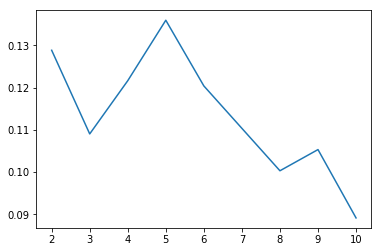

In [86]:
plt.plot(range_n_clusters, s_list)

In [ ]:
h_clustering = AgglomerativeClustering().fit(v)



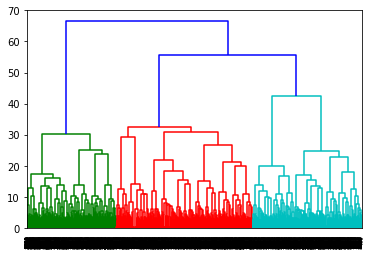

In [8]:
dendrogram = sch.dendrogram(sch.linkage(v, method='ward')) #based on the viz, 3 clusters
#ward method gives the best results 

In [26]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(v)
labels = model.labels_

In [21]:
labels

array([2, 2, 0, ..., 1, 1, 0])

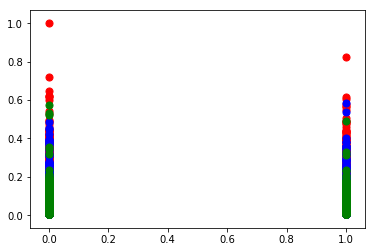

In [24]:
plt.scatter(v[labels==0, 0], v[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(v[labels==1, 0], v[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(v[labels==2, 0], v[labels==2, 1], s=50, marker='o', color='green')